## Introduction to SIFT (Scale-Invariant Feature Transform)

주요 4단계 절차

### 1. Scale-space Extrema Detection  
DoG(Difference of Gaussian)을 이용하여 이미지에서 스케일-공간 좌표상 극값을 찾는다.  
만약 극값이 있다면 이를 Potential Keypoint라 한다.

### 2. Keypoint Localization  
이미지에서 잠재적 키포인트들의 위치를 모두 찾았다면, 보다 정확한 결과를 위해 테일러 전개를 이용, 키포인트를 추출한다.

### 3. Orientation Assignment  
최종적으로 추출된 키포인트들에 방향성 불변이 되도록 방향을 할당한다.

### 4. Keypoint Descriptor  
키포인트 기술자를 계산한다. 이미지 히스토그램을 활용하고, 몇 가지 측정값을 추가한다.

### 5.Keypoint Matching

## Code

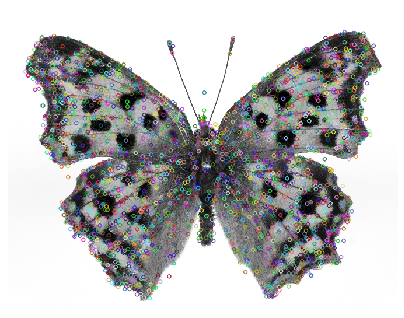

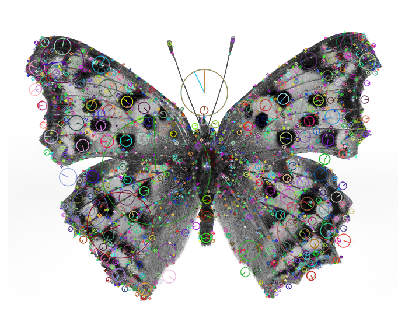

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread('../data/ex7.png', 0)

sift = cv2.xfeatures2d.SIFT_create() # SIFT 객체 생성
kp, des = sift.detectAndCompute(img, None) # 이미지에서 키포인트들을 계산하고 추출

img2 = cv2.drawKeypoints(img, kp, outImage=None) # 이미지에 키포인트의 위치를 원으로 표시
img3 = cv2.drawKeypoints(img, kp, outImage=None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # 위치와 크기 방향성 까지 표시(flags)

plt.figure(figsize=(7,7))
plt.imshow(img2)
plt.axis('off')
plt.show()

plt.figure(figsize=(7,7))
plt.imshow(img3)
plt.axis('off')
plt.show()

## Feature matching using Brute-Force matcher

두 이미지의 특성을 비교하는 가장 단순한 방법은 전수조사일 것이다.  
이미지 A, B가 있다고 하면, 이미지 A에서 하나의 특징기술자를 취하고, 이 기술자를 이미지 B의 모든 특징기술자와 거리 계산 방법을 이용해 하나하나 비교한다.  
이렇게 해서 나온 결과중 가장 비슷한 값을 리턴한다. 이런 식으로 이미지 A의 모든 특징기술자에 대해 계산하는 방법을 BF 매칭이라 칭한다.

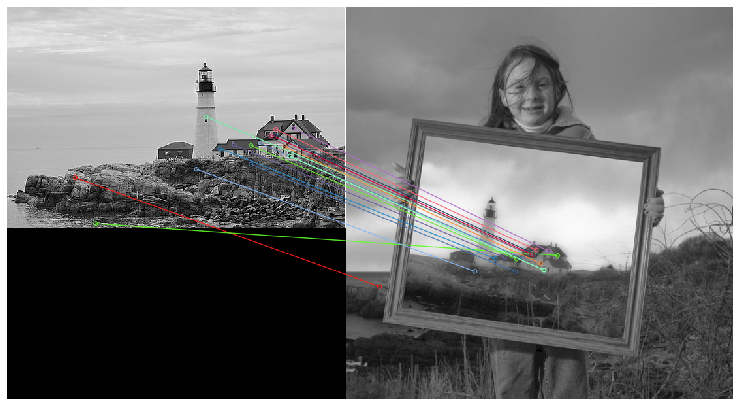

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

img1 = cv2.imread('../data/ex8.png', 0) # target image
img2 = cv2.imread('../data/ex9.png', 0) # original image

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# BFMatcher with default params
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,outImg=None,flags=2)

plt.figure(figsize=(13,13))
plt.imshow(img3)
plt.axis('off')
plt.show()